In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from sac_disc import SAC
from policy_net import PolicyNetwork
from q_net import QNetwork

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

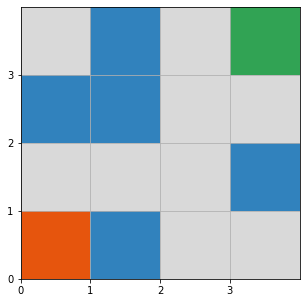

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=True,
)

In [4]:
sac = SAC(
    env=env,
    name='maze',
    input_dim=env.n_states,
    log_freq=50
)

In [5]:
sac.run(1000)

collecting experience...
0..50..100..Episode: 150, Reward: -158.94999999999996, Avg. Reward: -254.49500000000006, Policy Loss=45.75
Episode: 200, Reward: -103.69999999999997, Avg. Reward: -332.87300000000016, Policy Loss=121.65
Episode: 250, Reward: -301.99999999999994, Avg. Reward: -233.06400000000008, Policy Loss=158.97
Episode: 300, Reward: -878.2500000000022, Avg. Reward: -363.22100000000034, Policy Loss=181.62
Episode: 350, Reward: -169.1999999999994, Avg. Reward: -543.4570000000002, Policy Loss=273.36
Episode: 400, Reward: -169.1999999999994, Avg. Reward: -372.5759999999998, Policy Loss=215.58
Episode: 450, Reward: -169.1999999999994, Avg. Reward: -169.1999999999994, Policy Loss=142.97
Episode: 500, Reward: -169.1999999999994, Avg. Reward: -169.1999999999994, Policy Loss=110.72
Episode: 550, Reward: -169.1999999999994, Avg. Reward: -169.1999999999994, Policy Loss=96.35
Episode: 600, Reward: -169.1999999999994, Avg. Reward: -169.1999999999994, Policy Loss=89.89
Episode: 650, Rewar

#### Training

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(500), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['avg_reward'] for _, log in sac.logs.items()]
ax[1].plot(range(500), cumulative_rewards)
ax[1].set_title('Average reward per episode')